<a href="https://colab.research.google.com/github/ZahraShahlaie/Matching_Template/blob/main/Matching_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
shutil.rmtree("/content/backgrounds_images")
shutil.rmtree("/content/data")
shutil.rmtree("/content/Matching template")


# Cloning repository from GitHub

In [ ]:
# Cloning the GradientGenerator repository from GitHub
!git clone https://github.com/HYOUG/GradientGenerator.git

Cloning into 'GradientGenerator'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 52 (delta 23), reused 34 (delta 12), pack-reused 0
Receiving objects: 100% (52/52), 8.89 KiB | 2.96 MiB/s, done.
Resolving deltas: 100% (23/23), done.


# Install the Ultralytics library, which includes YOLOv8 models


In [ ]:
!pip install U ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.5/792.5 kB 9.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

# To download files from Google Drive using Python

In [ ]:
!pip install gdown

# for enhancing the diversity and size of image datasets

In [ ]:
!pip install Augmentor

# Install progress bar library to code for loops

In [ ]:
!pip install tqdm

# import libraries

In [ ]:
import os
import cv2
import math
import gdown
import shutil
import random
import Augmentor
import cv2 as cv
import numpy as np
from PIL import Image
from tqdm import tqdm
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Download the required project data folder, input images, background images and test images from Google Drive

In [ ]:
# URL of the Google Drive folder
url = 'https://drive.google.com/drive/folders/1_3M9iKMUtLfvulaptCxpqQmh2Pdz0IKx?usp=drive_link'

# Change the folder ID to the correct format for gdown
folder_id = url.split('/')[-1].split('?')[0]
download_url = f'https://drive.google.com/drive/folders/{folder_id}'

# Download the folder
gdown.download_folder(download_url, quiet=False)

Retrieving folder contents


Retrieving folder 1elkfCVeyqmqaaItFNVhrLxfaCamhYbVr background
Processing file 1Ep5aNNhf-Udjq7oP8nGCgcc53WVkqeej back_dow1.png
Processing file 1ggcrXud6w-mOCSoz6mpSW5JJXSvNTCt_ back_dow2.png
Processing file 14CnaA_hbjYhosO5qLl8E9tc2jnxHG5qH back_dow3.png
Processing file 1bG5hGDCaTyD28Jwc7dElBoXiRA0GkYn4 back_dow4.png
Processing file 1lEL7yb5xKmB6nV1Xz0SYf1DsmMTF04hr back_dow5.png
Processing file 1PDTuihRWE5Y1JcmDPF7NTDUfUlQWMqip back_dow6.png
Processing file 1b0Kx6yBNF8cwBiUzsAAgM4prS76pKYEV back_dow7.png
Processing file 1WM6wfbeOpOGWTxQLX2wrjns3Vv5lPgG2 back_dow8.png
Processing file 14VsUdGrUVdLoQJFAGbVJXgONGI9WoX2W back_dow9.png
Processing file 1tNAU5W53iEuSzMlIdg13SxM36YPSzp2R back_dow10.png
Retrieving folder 1RfJdXot3LJOTwWN2Yb1d94CByGumQp1k input images
Processing file 1iwaIQSGzS3rUE0Yu5Hgt_zEpcNJZoXyT 1_input_image.png
Processing file 1mb9hZRRWEhYUMMrhou3fQureITdQt4IT 2_input_image.png
Processing file 1Umug3-cL2WrLWNNC5SIAWa9EEyM4Aum_ 3_input_image.png
Processing file 1x15b4jHDJ-

Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1Ep5aNNhf-Udjq7oP8nGCgcc53WVkqeej
To: /content/Matching template/background/back_dow1.png
100%|██████████| 299k/299k [00:00<00:00, 4.21MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ggcrXud6w-mOCSoz6mpSW5JJXSvNTCt_
To: /content/Matching template/background/back_dow2.png
100%|██████████| 111k/111k [00:00<00:00, 3.41MB/s]
Downloading...
From: https://drive.google.com/uc?id=14CnaA_hbjYhosO5qLl8E9tc2jnxHG5qH
To: /content/Matching template/background/back_dow3.png
100%|██████████| 854k/854k [00:00<00:00, 8.23MB/s]
Downloading...
From: https://drive.google.com/uc?id=1bG5hGDCaTyD28Jwc7dElBoXiRA0GkYn4
To: /content/Matching template/background/back_dow4.png
100%|██████████| 296k/296k [00:00<00:00, 4.04MB/s]
Downloading...
From: https://drive.google.com/uc?id=1lEL7yb5xKmB6nV1Xz0SYf1DsmMTF04hr
To: /content/Matching template/backgr

['/content/Matching template/background/back_dow1.png',
 '/content/Matching template/background/back_dow2.png',
 '/content/Matching template/background/back_dow3.png',
 '/content/Matching template/background/back_dow4.png',
 '/content/Matching template/background/back_dow5.png',
 '/content/Matching template/background/back_dow6.png',
 '/content/Matching template/background/back_dow7.png',
 '/content/Matching template/background/back_dow8.png',
 '/content/Matching template/background/back_dow9.png',
 '/content/Matching template/background/back_dow10.png',
 '/content/Matching template/input images/1_input_image.png',
 '/content/Matching template/input images/2_input_image.png',
 '/content/Matching template/input images/3_input_image.png',
 '/content/Matching template/input images/4_input_image.png',
 '/content/Matching template/test images/test1.jpg',
 '/content/Matching template/test images/test2.jpg',
 '/content/Matching template/test images/test3.jpg',
 '/content/Matching template/tes

# To prepare the folders:

**backgrounds_directory** : When we generate images as background, we save them in this folder.

**train_images** : We store the images that we will produce as a dataset for training the YOLO network in this folder.

**train_labels** : We store the labels for images that we will produce as a dataset for training the YOLO network in this folder.

**validation_images** : We store the images that we will use as a dataset for validating the YOLO network in this folder.

**validation_labels** : We store the labels for images that we will use as a dataset for validating the YOLO network in this folder.

In [ ]:
# Create the backgrounds directory if it doesn't exist
backgrounds_directory = "/content/backgrounds_images"

# create labels and images for training dataset yolo
train_images = "/content/data/train/images"
train_labels = "/content/data/train/labels"

# create labels and images for validation dataset for yolo
validation_images = "/content/data/validation/images"
validation_labels = "/content/data/validation/labels"

# create labels and images for test dataset for yolo
test_images = "/content/data/test/images"
test_labels = "/content/data/test/labels"

folder_list = [backgrounds_directory , train_images , train_labels,validation_images,validation_labels,test_images,test_labels ]
# Check the existence of the directory and create it if it doesn't exist

for folder in folder_list:
  os.makedirs(folder, exist_ok=True)



show some of images in all_input folder

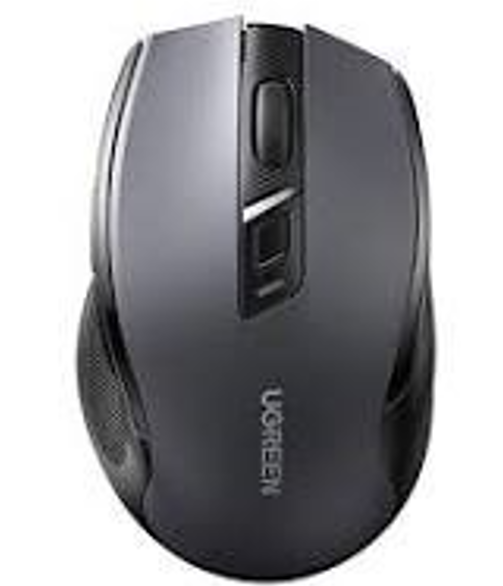

In [ ]:
input_images="/content/Matching template/input images"

# List all files in the directory
images_name = os.listdir(input_images)

# Read and store all images
images= []
for image_name in images_name:
    image_path = os.path.join(input_images, image_name)
    image = Image.open(image_path)
    images.append(image)


# Optionally, you can do something with the images, for example, display the first image
images[3] if images else print("No images found.")


In [ ]:
# Define the global variable for number_of_background
number_of_background = 0

def create_back(r_channel, g_channel, b_channel):
    global number_of_background  # Use the global variable to modify the variable within the function

    # The name of the background that is created in each step
    bac_created = []

    # define fix colors  1-white 2-black 3-yellow 4-red 5-blue
    colors = [[255,255,255],[0,0,0],[255,255,0],[255,0,0],[0,0,255]]


    for color in colors:

        # Call the GradientGenerator script using the r_channel, g_channel, and b_channel parameters
        # the size of images that be created is 640 * 640
        !python /content/GradientGenerator/gradientgen.py 640 640 {color[0]} {color[1]} {color[2]} {r_channel} {g_channel} {b_channel}

        # Move the gradient.png file to the backgrounds folder Because after executing the above script,images with the name gradient.png in content are created
        shutil.move("/content/gradient.png", "/content/backgrounds_images")

        # Generate the new file name
        number_of_background += 1
        new_path = f"/content/backgrounds_images/bac{number_of_background}.png"

        # Rename the file
        os.rename("/content/backgrounds_images/gradient.png", new_path)

        print(f"The image has been moved to '/content/backgrounds_images' with the new name 'bac{number_of_background}.png'.")

        # Add new file names to the list
        bac_created.append(new_path)

    return bac_created


### Image Processing and Labeling for YOLO Training


1. **Load and Resize Images**: Reads images from the specified directory and resizes them to a fixed size.
2. **Compute Average Color**: Calculates the average color of each image to generate backgrounds that blend well with the input images.
3. **Generate Backgrounds**: Creates multiple background images using the computed average colors and predefined fixed colors.
4. **Combine Images**: Splits each background into a grid and overlays the resized input image onto each section of the grid.
5. **Save Results**: Stores the combined images and their corresponding bounding box coordinates in the designated directories. The bounding box coordinates are saved in text files formatted for YOLO training.
6. **Display Results**: Shows the combined images and prints the bounding box coordinates for verification.



# Create background images for each input image, placing each input image at different coordinates and sizes on the backgrounds.

This code essentially creates a background for each image found in the input directory and randomly places several images from the input set onto each background. For each input image, it resizes it, calculates its average color, and then places it multiple times on randomly chosen positions within each background. It also saves the positional information of these input images in various files and displays the combined images.

In [ ]:
# List to store filenames
images_name = os.listdir(input_images)

# List to save the average color of the images
mean_color_list_of_images = []

# List to save the path of images
images_path = []

def create_background():
    for image_name in images_name:

      image_path = os.path.join(input_images, image_name)

      img2 = cv.imread(image_path)  # input images

      image = Image.open(image_path)
      images_path.append(image)

      # Calculate the average color of the image
      avg_color_per_row = np.average(img2, axis=0)
      avg_color = np.average(avg_color_per_row, axis=0)
      avg_color_int = avg_color.astype(int)
      mean_color_list_of_images.append(avg_color_int)

      r_channel = avg_color_int[0]
      g_channel = avg_color_int[1]
      b_channel = avg_color_int[2]

      # Create a background for each image
      created_images = create_back(r_channel, g_channel, b_channel)


In [ ]:
created_images = create_background()

The image has been moved to '/content/backgrounds_images' with the new name 'bac1.png'.
The image has been moved to '/content/backgrounds_images' with the new name 'bac2.png'.
The image has been moved to '/content/backgrounds_images' with the new name 'bac3.png'.
The image has been moved to '/content/backgrounds_images' with the new name 'bac4.png'.
The image has been moved to '/content/backgrounds_images' with the new name 'bac5.png'.
The image has been moved to '/content/backgrounds_images' with the new name 'bac6.png'.
The image has been moved to '/content/backgrounds_images' with the new name 'bac7.png'.
The image has been moved to '/content/backgrounds_images' with the new name 'bac8.png'.
The image has been moved to '/content/backgrounds_images' with the new name 'bac9.png'.
The image has been moved to '/content/backgrounds_images' with the new name 'bac10.png'.
The image has been moved to '/content/backgrounds_images' with the new name 'bac11.png'.
The image has been moved to '/

move downloaded background in backgrounds_images folder

In [ ]:
# List all background images in the source directory
background_images_to_move = os.listdir("/content/Matching template/background")

# Move the files to the destination folder
for image_name in background_images_to_move:
    image_path = os.path.join("/content/Matching template/background", image_name)
    if os.path.exists(image_path):
        destination_path = os.path.join(backgrounds_directory, image_name)
        shutil.move(image_path, destination_path)
        print(f"Moved {image_path} to {destination_path}")
    else:
        print(f"File not found: {image_path}")


Moved /content/Matching template/background/back_dow3.png to /content/backgrounds_images/back_dow3.png
Moved /content/Matching template/background/back_dow8.png to /content/backgrounds_images/back_dow8.png
Moved /content/Matching template/background/back_dow4.png to /content/backgrounds_images/back_dow4.png
Moved /content/Matching template/background/back_dow7.png to /content/backgrounds_images/back_dow7.png
Moved /content/Matching template/background/back_dow10.png to /content/backgrounds_images/back_dow10.png
Moved /content/Matching template/background/back_dow1.png to /content/backgrounds_images/back_dow1.png
Moved /content/Matching template/background/back_dow6.png to /content/backgrounds_images/back_dow6.png
Moved /content/Matching template/background/back_dow9.png to /content/backgrounds_images/back_dow9.png
Moved /content/Matching template/background/back_dow5.png to /content/backgrounds_images/back_dow5.png
Moved /content/Matching template/background/back_dow2.png to /content/b

In [ ]:
#Create a pipeline for applying transformations
p = Augmentor.Pipeline(source_directory=input_images, output_directory=input_images)

# Apply various transformations
p.rotate(probability=0.9, max_left_rotation=25, max_right_rotation=25)
p.flip_left_right(probability=0.5)
p.flip_top_bottom(probability=0.5)
p.random_contrast(probability=0.5, min_factor=0.7, max_factor=1.3)
p.random_brightness(probability=0.5, min_factor=0.7, max_factor=1.3)
p.zoom_random(probability=0.5, percentage_area=0.9)
p.random_distortion(probability=0.5, grid_width=4, grid_height=4, magnitude=8)
p.shear(probability=0.5, max_shear_left=10, max_shear_right=10)  # Add shear transformation

# Set the number of images you want to generate
p.sample(50)

#Generate images
p.process()


Initialised with 4 image(s) found.
Output directory set to /content/Matching template/input images.

Processing <PIL.Image.Image image mode=RGBA size=503x586 at 0x7FC8EA591660>: 100%|██████████| 50/50 [00:07<00:00,  6.97 Samples/s]
Processing <PIL.Image.Image image mode=RGBA size=503x586 at 0x7FC8EA53F280>: 100%|██████████| 4/4 [00:00<00:00,  5.18 Samples/s]


#we define again because the augmented images added in this 'input images' folder

In [ ]:
# List all files in the directory
images_name = os.listdir(input_images)

# Combining all input images with various backgrounds and generating corresponding labels for training the YOLO network.







This step ensures that each input image is inserted on each of the backgrounds

In [ ]:
# Counter to name image results and stored labels
number_of_result = 0
number_of_Coordinate = 0

created_images = os.listdir(backgrounds_directory)

def create_picture(img_size, num_pic, created_images):
    global number_of_result, number_of_Coordinate

    for image_name in tqdm(images_name):
        image_path = os.path.join(input_images, image_name)
        img2 = cv.imread(image_path)  # input images
        # Change the size of the second image
        img2 = cv.resize(img2, (img_size, img_size))

        for created_image_name in created_images:
            created_image_path = os.path.join(backgrounds_directory, created_image_name)
            # Read the background images
            img1 = cv.imread(created_image_path)  # background

            if img1 is None:
                print(f"Error: Could not read background image {created_image_path}")
                continue

            # Clear lists for each iteration
            results = []
            Coordinates = []

            # Combine the second image with each section of the first image
            for _ in range(num_pic):
                # Generate random positions
                y = random.randint(0, img1.shape[0] - img_size)
                x = random.randint(0, img1.shape[1] - img_size)
                # Copy of the original image
                temp_img = img1.copy()
                # Place the second image on the background at random position
                temp_img[y:y + img_size, x:x + img_size] = cv.addWeighted(temp_img[y:y + img_size, x:x + img_size], 0.2, img2, 0.8, 0)

                results.append(temp_img)
                Coordinates.append((x, y, img_size, img_size))  # Store coordinates as (x, y, width, height)

            # Save all combined images
            for idx, result in enumerate(results):
                result_path = os.path.join(train_images, f"result_{number_of_result}.png")
                cv.imwrite(result_path, result)
                number_of_result += 1

            # Save all coordinates in YOLO format
            for idx, Coordinate in enumerate(Coordinates):
                # Calculate YOLO format coordinates
                x_center = (Coordinate[0] + Coordinate[2] / 2) / img1.shape[1]
                y_center = (Coordinate[1] + Coordinate[3] / 2) / img1.shape[0]
                width = Coordinate[2] / img1.shape[1]
                height = Coordinate[3] / img1.shape[0]

                # Create txt file for every Coordinate
                Coordinate_path = os.path.join(train_labels, f"result_{number_of_Coordinate}.txt")
                with open(Coordinate_path, 'w') as f:
                    # Write class and coordinates in every txt file
                    f.write(f"0 {x_center} {y_center} {width} {height}\n")
                number_of_Coordinate += 1
"""
            # Display all composite images
            rows = math.ceil(math.sqrt(num_pic))
            cols = math.ceil(num_pic / rows)

            fig, axs = plt.subplots(rows, cols, figsize=(8, 8))
            axs = axs.flatten()

            for idx in range(len(results)):
                result_rgb = cv.cvtColor(results[idx], cv.COLOR_BGR2RGB)
                axs[idx].imshow(result_rgb)
                axs[idx].axis('off')

            # Turn off the remaining empty subplots
            for ax in axs[len(results):]:
                ax.axis('off')

            plt.show()

            # Print positions for use in labeling
            for Coordinate in Coordinates:
                print(f'Label position: {Coordinate}')

# Show one image
if images_path:
    images_path[1].show()
else:
    print("No images found.")
"""

'\n            # Display all composite images\n            rows = math.ceil(math.sqrt(num_pic))\n            cols = math.ceil(num_pic / rows)\n\n            fig, axs = plt.subplots(rows, cols, figsize=(8, 8))\n            axs = axs.flatten()\n\n            for idx in range(len(results)):\n                result_rgb = cv.cvtColor(results[idx], cv.COLOR_BGR2RGB)\n                axs[idx].imshow(result_rgb)\n                axs[idx].axis(\'off\')\n\n            # Turn off the remaining empty subplots\n            for ax in axs[len(results):]:\n                ax.axis(\'off\')\n\n            plt.show()\n\n            # Print positions for use in labeling\n            for Coordinate in Coordinates:\n                print(f\'Label position: {Coordinate}\')\n\n# Show one image\nif images_path:\n    images_path[1].show()\nelse:\n    print("No images found.")\n'

In [ ]:
# Generate composite images with input images placed on randomly selected backgrounds
create_picture(50, 15, created_images)  # Create 15 images with each input image resized to 50*50 pixels
create_picture(110, 10, created_images)  # Create 10 images with each input image resized to 110x110 pixels

100%|██████████| 58/58 [04:56<00:00,  5.12s/it]


# Number of images created


In [ ]:
image_files = os.listdir(train_images)
num_train_image_first_part = len(image_files)

print(f" {num_train_image_first_part} images for training")


 43500 images for training


# Function to check if a new image at position (x, y) with size 'img_size' overlaps with any existing images


In essence, the function analytically checks whether the bounding boxes of a new image overlap with any of the existing images. It uses a formula based on the coordinates and dimensions of the two bounding boxes to determine their overlap:

- `x < x2 + w2`: Ensures the bounding box of the new image overlaps with the right side of the bounding box of the existing image.
- `x + img_size > x2`: Ensures the bounding box of the new image overlaps with the left side of the bounding box of the existing image.
- `y < y2 + h2`: Ensures the bounding box of the new image overlaps with the bottom side of the bounding box of the existing image.
- `y + img_size > y2`: Ensures the bounding box of the new image overlaps with the top side of the bounding box of the existing image.

If any of these conditions are true, it indicates that the new image overlaps with the existing image, and the function returns `True`. Otherwise, if none of these conditions are met, it means the new image does not overlap with any of the existing images, and the function returns `False`.

In [ ]:
# Parameters:
# - x, y: Coordinates of the top-left corner of the new image
# - img_size: Size of the new image (assumed to be square with dimensions img_size x img_size)
# - coordinates: List of tuples, each representing the position and size of an existing image (x2, y2, w2, h2)
# Returns:
# - True if the new image overlaps with any existing image, False otherwise
def check_overlap(x, y, img_size, coordinates):
    for (x2, y2, w2, h2) in coordinates:
        # Check if the bounding boxes of the new and existing images overlap
        if (x < x2 + w2 and x + img_size > x2 and
            y < y2 + h2 and y + img_size > y2):
            return True
    return False


# Function to create composite images by overlaying randomly selected images from 'input_images' onto every backgrounds


In [ ]:
# List all filenames (images) in the 'backgrounds_directory' directory
back_names = os.listdir(backgrounds_directory)

# Function to create composite images by overlaying randomly selected images from 'input_images' onto backgrounds
def create_pictures():
  global number_of_result, number_of_Coordinate
  for back_name in back_names:
        # Load background image
        image_path = os.path.join(backgrounds_directory, back_name)
        img_back = cv.imread(image_path)

        # Resize background image to 640x640 pixels
        img_back = cv.resize(img_back, (640, 640))

        # Lists to store composite results and their coordinates
        results = []
        Coordinates = []

        # Randomly choose number of images to overlay on the background (between 2 to 5)
        num_images_in_background = random.randint(2, 5)
        selected_images = random.choices(images_name, k=num_images_in_background)

        # Overlay selected images onto the background
        for selected_image in selected_images:
            selected_image_path = os.path.join(input_images, selected_image)

            # Read and resize selected image
            selected_image_sample = cv.imread(selected_image_path)
            img_size = random.randint(48, 210)
            selected_image_sample = cv.resize(selected_image_sample, (img_size, img_size))

            # Ensure no overlap with existing images on the background
            max_attempts = 100
            for attempt in range(max_attempts):
                y = random.randint(0, img_back.shape[0] - img_size)
                x = random.randint(0, img_back.shape[1] - img_size)
                if not check_overlap(x, y, img_size, Coordinates):
                    break

            # Blend selected image onto the background at the determined position
            img_back[y:y + img_size, x:x + img_size] = cv.addWeighted(img_back[y:y + img_size, x:x + img_size], 0.2, selected_image_sample, 0.8, 0)

            # Store coordinates of the overlayed image
            Coordinates.append((x, y, img_size, img_size))

        # Store the composed image
        results.append(img_back)

        # Save all composed images
        for idx, result in enumerate(results):
            result_path = os.path.join(train_images, f"result_{number_of_result}.png")
            cv.imwrite(result_path, result)
            number_of_result += 1

        # Save coordinates in YOLO format
        Coordinate_path = os.path.join(train_labels, f"result_{number_of_Coordinate}.txt")
        with open(Coordinate_path, 'w') as f:
            for idx, Coordinate in enumerate(Coordinates):
                # Calculate YOLO format coordinates
                x_center = (Coordinate[0] + Coordinate[2] / 2) / img_back.shape[1]
                y_center = (Coordinate[1] + Coordinate[3] / 2) / img_back.shape[0]
                width = Coordinate[2] / img_back.shape[1]
                height = Coordinate[3] / img_back.shape[0]

                # Write class and coordinates to the YOLO format text file
                f.write(f"0 {x_center} {y_center} {width} {height}\n")
            number_of_Coordinate += 1
"""
        # Display the composed image
        fig, ax = plt.subplots(1, 1, figsize=(4, 4))
        result_rgb = cv.cvtColor(results[0], cv.COLOR_BGR2RGB)
        ax.imshow(result_rgb)
        ax.axis('off')
        plt.show()

        # Print positions for labeling purposes
        for Coordinate in Coordinates:
            print(f'Label position: {Coordinate}')
"""

"\n        # Display the composed image\n        fig, ax = plt.subplots(1, 1, figsize=(4, 4))\n        result_rgb = cv.cvtColor(results[0], cv.COLOR_BGR2RGB)\n        ax.imshow(result_rgb)\n        ax.axis('off')\n        plt.show()\n\n        # Print positions for labeling purposes\n        for Coordinate in Coordinates:\n            print(f'Label position: {Coordinate}')\n"

In [ ]:
for _ in tqdm(range(10)):
  # Generate composite images and their corresponding labels
  create_pictures()

# Number of images created


In [ ]:
image_files = os.listdir(train_images)
num_train_image_second_part = len(image_files)
num_train_image = num_train_image_second_part-num_train_image_first_part
print(f" {num_train_image_first_part}  images were created in the previous step.")
print(f" {num_train_image} images were created here.")
print(f" The total number of images created is {num_train_image_second_part}")


 43500  images were created in the previous step.
 300 images were created here.
 The total number of images created is 43800


# see one sample

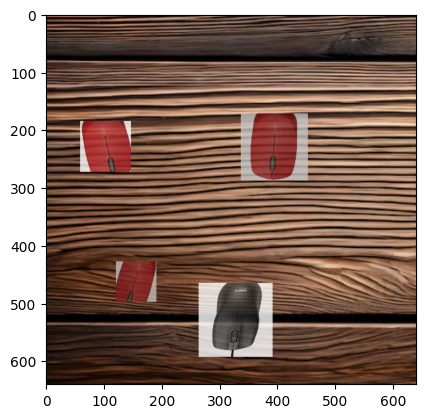

In [ ]:
image_path = "/content/data/train/images/result_43750.png"
img = cv.imread(image_path)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

In [ ]:
file_path = "/content/data/train/labels/result_43750.txt"

# Open the file
with open(file_path, 'r') as file:
    # Read the contents of the file
    content = file.read()

# Print the contents
print(content)


0 0.1609375 0.3578125 0.1375 0.1375
0 0.6171875 0.359375 0.18125 0.18125
0 0.5125 0.8265625 0.2 0.2
0 0.24375 0.7234375 0.109375 0.109375



# Transferring 20% of images and labels to the validation dataset

In [ ]:
# Transferring 20% of images and labels to the validation dataset
image_files = os.listdir(train_images)
label_files = os.listdir(train_labels)
num_validation_samples = int(0.2 * len(image_files))

validation_image_files = random.sample(image_files, num_validation_samples)
for image_file in validation_image_files:
    label_file = image_file.replace('.png', '.txt')

    # Transferring image and label files
    shutil.move(os.path.join(train_images, image_file), os.path.join(validation_images, image_file))
    shutil.move(os.path.join(train_labels, label_file), os.path.join(validation_labels, label_file))

print(f"Moved {num_validation_samples} images and their labels to validation dataset.")

Moved 8760 images and their labels to validation dataset.


# Transferring 10% of images and labels to the test dataset

In [ ]:
# Transferring 10% of images and labels to the test dataset
image_files = os.listdir(train_images)
label_files = os.listdir(train_labels)
num_test_samples = int(0.1 * len(image_files))

test_image_files = random.sample(image_files, num_test_samples)
for image_file in test_image_files:
    label_file = image_file.replace('.png', '.txt')

    # Transferring image and label files
    shutil.move(os.path.join(train_images, image_file), os.path.join(test_images, image_file))
    shutil.move(os.path.join(train_labels, label_file), os.path.join(test_labels, label_file))

print(f"Moved {num_test_samples} images and their labels to validation dataset.")

Moved 3504 images and their labels to validation dataset.


# Counting the number of images in the training , validation datasets and test datasets


In [ ]:
image_files = os.listdir(train_images)
validation_image_file = os.listdir(validation_images)
test_image_file = os.listdir(test_images)

num_train_image = len(image_files)
num_validation_images = len(validation_image_file)
num_test_images = len(test_image_file)


print(f" {num_train_image} images for training")
print(f" {num_validation_images} images for validation")
print(f" {num_test_images} images for test")

 31536 images for training
 8760 images for validation
 3504 images for test


# create dasatet.yaml file

In [ ]:
 #create yaml file for yolo dataset
yaml_path = os.path.join("/content/data", "dataset.yaml")

#write name of class and coordinate in every txt file
with open(yaml_path, 'w') as f:
    f.write(
        "#train_and_val_data\n"
        "train: /content/data/train\n"
        "val: /content/data/validation\n"
        "#number_of_classes\n"
        "nc: 1\n"
        "#classes_names\n"
        "names: ['object']"
    )

# training YOLOv8 on a custom dataset:

 Model: yolov8n.pt

 Data: /content/data/dataset.yaml

 Training for 7 epochs with image size 640x640

 Augmentation settings: HSV hue, saturation, value adjustments, rotation, translation, scaling, horizontal flip, mosaic, and perspective transformation


In [33]:
!yolo task=detect mode=train model='yolov8n.pt' data='/content/data/dataset.yaml' epochs=7 imgsz=640 \
    hsv_h=0.02 hsv_s=0.8 hsv_v=0.5 degrees=15 translate=0.1 scale=0.5 shear=2.0 fliplr=0.5 mosaic=1.0 perspective=0.001 \
    batch=32


100% 6.23M/6.23M [00:00<00:00, 121MB/s]
Ultralytics YOLOv8.2.38 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data/dataset.yaml, epochs=7, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, 

In [34]:
# download best weights from training of yolo8n
from google.colab import files
files.download('/content/runs/detect/train/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Val

In [35]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt  data='/content/data/dataset.yaml'

Ultralytics YOLOv8.2.38 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/data/validation/labels.cache... 8760 images, 0 backgrounds, 0 corrupt: 100% 8760/8760 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 548/548 [01:58<00:00,  4.61it/s]
                   all       8760       8918          1          1      0.995      0.992
Speed: 0.4ms preprocess, 3.9ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


# predict test images dataset

In [36]:
!yolo task=detect mode=predict model='/content/runs/detect/train/weights/best.pt'  source='/content/data/test/images'

Ultralytics YOLOv8.2.38 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/3504 /content/data/test/images/result_1003.png: 640x640 1 object, 12.0ms
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
image 2/3504 /content/data/test/images/result_10049.png: 640x448 1 object, 93.4ms
image 3/3504 /content/data/test/images/result_1005.png: 640x640 1 object, 7.9ms
image 4/3504 /content/data/test/images/result_10057.png: 640x512 1 object, 67.5ms
image 5/3504 /content/data/test/images/result_10058.png: 640x512 1 object, 6.7ms
image 6/3504 /content/data/test/images/result_10069.png: 640x640 1 obj

# see some result of tesr images that predict with yolo8n

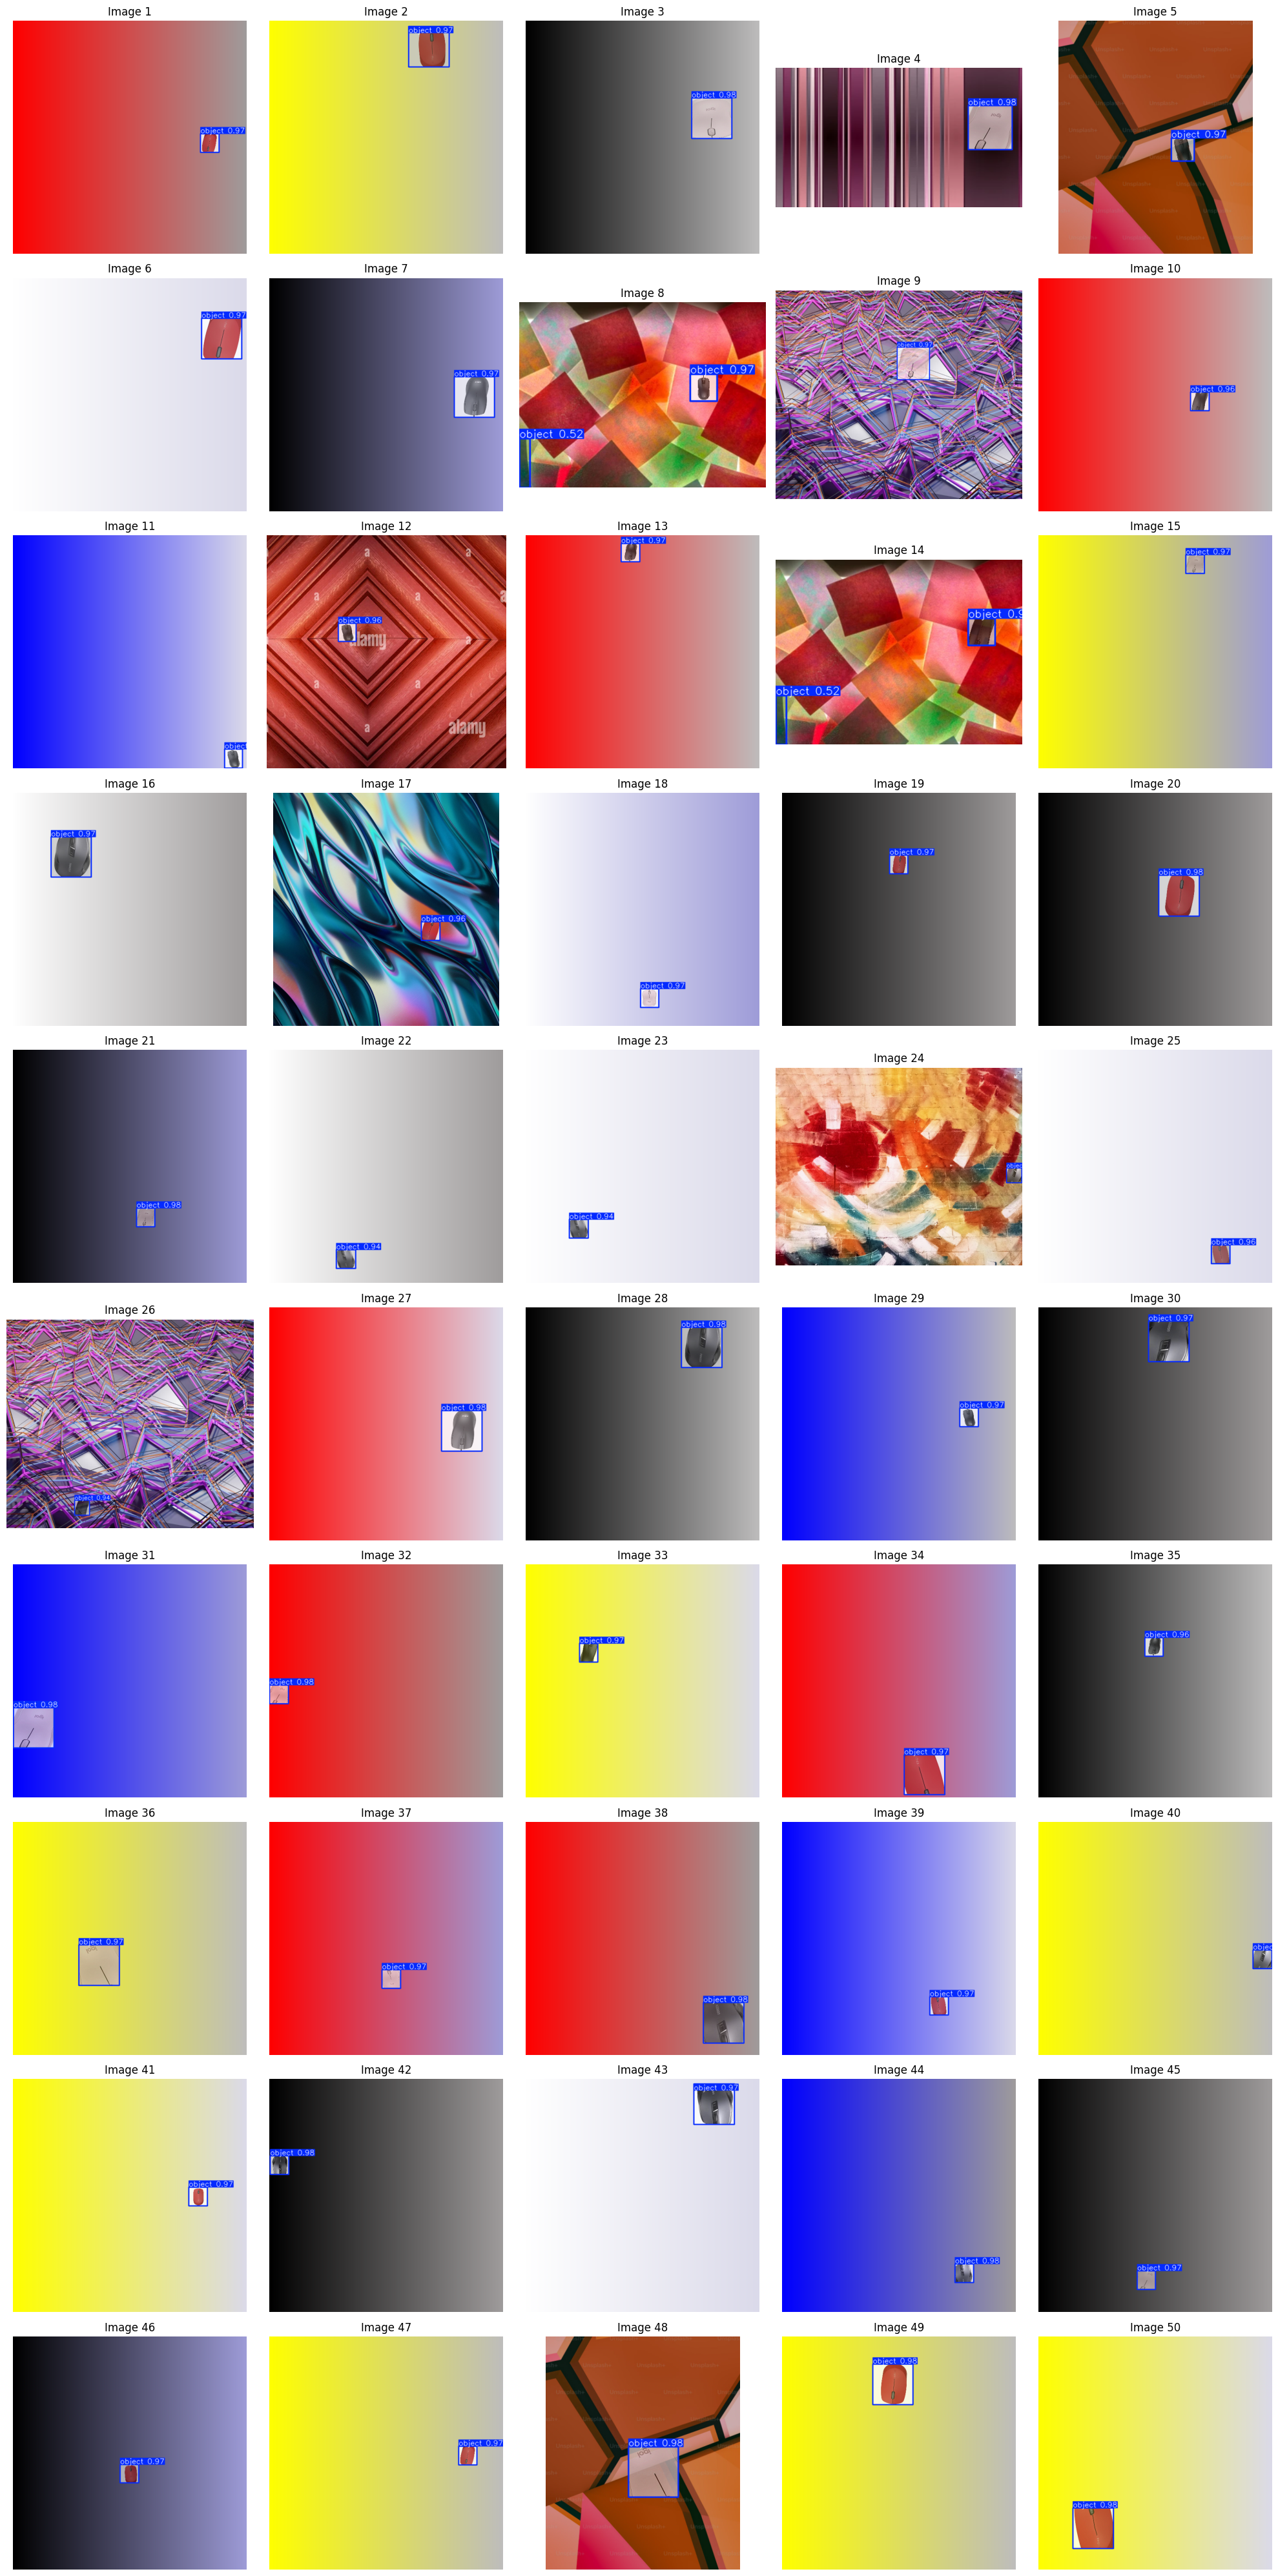

In [37]:
# Directory path containing the images
folder_path = '/content/runs/detect/predict'

# List all image files in the directory
image_files = os.listdir(folder_path)

# Select 50 random images from all images
random_images = random.sample(image_files, 50)

# Create a figure with 10 rows and 5 columns for displaying the images
fig, axs = plt.subplots(10, 5, figsize=(20, 40))

# Display the selected random images
for i, image_name in enumerate(random_images):
    row = i // 5  # Calculate the row
    col = i % 5   # Calculate the column

    # Load and display the image
    image_path = os.path.join(folder_path, image_name)
    img = mpimg.imread(image_path)
    axs[row, col].imshow(img)
    axs[row, col].axis('off')
    axs[row, col].set_title(f'Image {i+1}')

plt.tight_layout()
plt.show()


# predict with some downloded images

In [38]:
def show_test_result(image_path):
  # Read the image using OpenCV
  img = cv2.imread(image_path)

  # Convert the image from BGR to RGB (OpenCV uses BGR by default)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # Display the image using matplotlib
  plt.imshow(img_rgb)
  plt.axis('off')  # Turn off axis numbers and ticks
  plt.show()

In [39]:
!yolo task=detect mode=predict model='/content/runs/detect/train/weights/best.pt'  source='/content/Matching template/test images/test1.jpg'

Ultralytics YOLOv8.2.38 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/Matching template/test images/test1.jpg: 352x640 1 object, 102.9ms
Speed: 3.9ms preprocess, 102.9ms inference, 664.9ms postprocess per image at shape (1, 3, 352, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


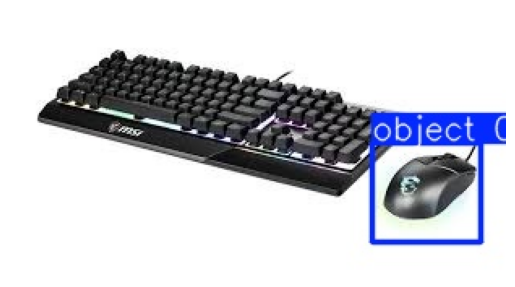

In [40]:
show_test_result("/content/runs/detect/predict2/test1.jpg")


In [41]:
!yolo task=detect mode=predict model='/content/runs/detect/train/weights/best.pt'  source='/content/Matching template/test images/test2.jpg'

Ultralytics YOLOv8.2.38 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/Matching template/test images/test2.jpg: 640x640 (no detections), 10.9ms
Speed: 4.1ms preprocess, 10.9ms inference, 42.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


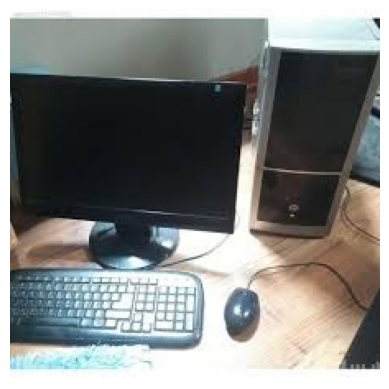

In [42]:
show_test_result("/content/runs/detect/predict3/test2.jpg")


In [43]:
!yolo task=detect mode=predict model='/content/runs/detect/train/weights/best.pt'  source='/content/Matching template/test images/test3.jpg'

Ultralytics YOLOv8.2.38 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/Matching template/test images/test3.jpg: 320x640 (no detections), 103.7ms
Speed: 2.8ms preprocess, 103.7ms inference, 46.5ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


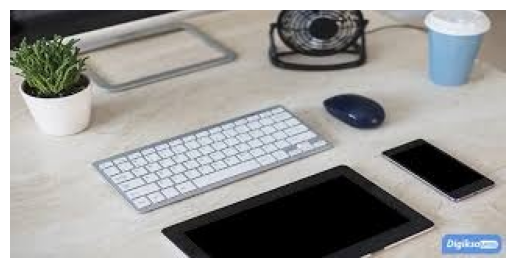

In [44]:
show_test_result("/content/runs/detect/predict4/test3.jpg")


In [45]:
!yolo task=detect mode=predict model='/content/runs/detect/train/weights/best.pt'  source='/content/Matching template/test images/test4.jpg'

Ultralytics YOLOv8.2.38 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/Matching template/test images/test4.jpg: 640x640 (no detections), 7.4ms
Speed: 3.6ms preprocess, 7.4ms inference, 29.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict


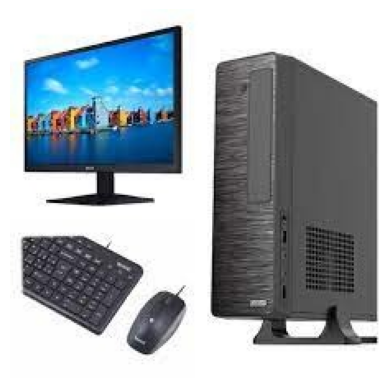

In [46]:
show_test_result("/content/runs/detect/predict5/test4.jpg")

## use webcam

In [ ]:
def take_photo_and_detect(filename='photo.jpg', quality=0.8):
    from IPython.display import Javascript, display
    from google.colab.output import eval_js
    import cv2
    import numpy as np
    import base64

    def js_to_image(js_data):
        img_bytes = base64.b64decode(js_data.split(',')[1])
        img_array = np.frombuffer(img_bytes, dtype=np.uint8)
        img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
        return img

    js = Javascript('''
    async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Resize the output to fit the video element.
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        // Wait for Capture to be clicked.
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getVideoTracks()[0].stop();
        div.remove();
        return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)

    # get photo data
    data = eval_js('takePhoto({})'.format(quality))
    # get OpenCV format image
    img = js_to_image(data)

    # save image
    cv2.imwrite(filename, img)

    # run YOLO model on the saved image
    !yolo task=detect mode=predict model='/content/runs/detect/train/weights/best.pt' source={filename}

    return filename


In [ ]:
# Call the function to take a photo and detect objects
take_photo_and_detect()

In [ ]:
show_test_result("photo.jpg")
